# Notebook Summary

At **Feature Selection** section, used .corrs function to find the correlation of all columns with the target 'applicationStatus'. Used the correlated features as attributes.


At the 'Model Training and Hyperparameter Tuning' section, experimented upsampling and downsampling method with 5 popular classifiers - Logistic Regression, Decision Tree, SVM, XGBoost, RandomForest. This is due to class imbalance in the original dataset.

Conducted tuning using GridSearchCV on hyperparameters suggested from websites below: [decisionTree](https://www.geeksforgeeks.org/how-to-tune-a-decision-tree-in-hyperparameter-tuning/), [Logistic Regression](https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69),[SVM](https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/).


### **Performance Analysis**
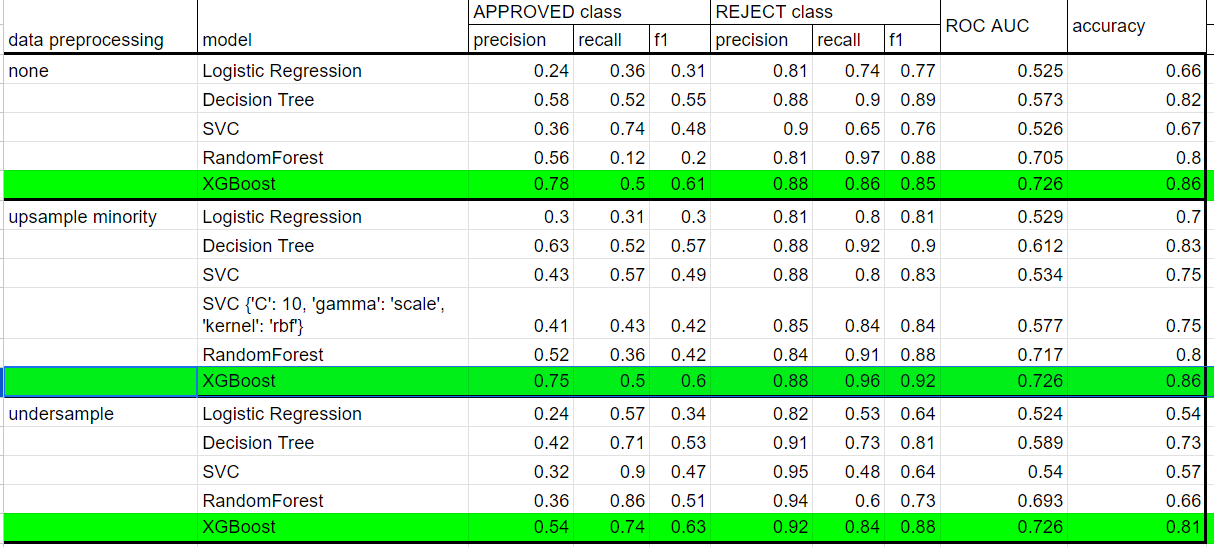
*  XGBoost performed best with F1 scores in the 0.7-0.8 range for the positive class across all categories. It performed best with none or upsampling the minority class, where it had an F1 score of 0.78 for the positive class.

*  Logistic Regression performed poorly across all categories with F1 scores below 0.35 for the positive class regardless of the data preprocessing technique. It performed best with upsampling where it had an F1 score of 0.3 for the positive class.


*  Upsampling the minority class seems to be the best data preprocessing technique for most of the models in this case. It improved the positive class recall for Logistic Regression, Decision Tree, and SVC. It also maintained a good positive class recall for Random Forest and XGBoost, the two models that performed best overall.

*  Hyperparameter tuning using GridSearchCV to maximize f1_macro (suitable for imbalance class) yield little to no improvement to model ROC_AUC score and F1 score.

### **Rationale behind choice of models**

*  Logistic Regression for its simplicity and interpretability.
*  SVM and Decision Trees for their ability to capture complex non-linear relationships.
*  Random Forest and XGBoost for their enhanced performance, robustness to outliers and imbalanced data.

 Random Forest constructs multiple decision trees using bootstrapped samples of the dataset. This means each tree is trained on a different subset of the data, which can help ensure that the minority class is represented in some of the trees.

 XGBoost is based on the gradient boosting framework, which sequentially builds trees where each tree corrects the errors of the previous ones. This iterative process can help in focusing more on the minority class instances that are often misclassified, thereby improving model performance on the imbalanced data.

## Feature Selection

Correlation score between attributes and applicationStatus are as below:

```
applicationStatus    1.000000
financeAmount        0.175429
loanTenure           0.161424
netSalary            0.139278
ela                  0.091244
loanApplied          0.060681
postcode            -0.021840
interestRate        -0.040390
```


*   InterestRate has negative correlation score.
*   Certain jobTitle i.e., jobTitle=teacher (0.121967) has higher correlation to applicationStatus than ela (0.091244), loanApplied (0.060681).
*   Certain loanReason i.e., education (0.058566) has higher correlation to applicationStatus than loanApplied (0.041048), netSalary (0.024745).


Hence selected features are all positively correlated numerical attributes and jobTitle, loanReason.





In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

train = train.drop(['address1','address2','address3','city','id','jobTitle','loanReason','state'],axis=1)
# Encode target variable
label_encoder = LabelEncoder()
train['applicationStatus'] = label_encoder.fit_transform(train['applicationStatus'])

# Compute the correlation matrix
correlation_matrix = train.corr()

# Get the correlations with the target variable
correlation_with_target = correlation_matrix['applicationStatus'].sort_values(ascending=False)
print(correlation_with_target)


applicationStatus    1.000000
financeAmount        0.175429
loanTenure           0.161424
netSalary            0.139278
ela                  0.091244
loanApplied          0.060681
postcode            -0.021840
interestRate        -0.040390
Name: applicationStatus, dtype: float64


Certain jobTitle i.e., jobTitle=teacher (0.121967) has higher correlation to applicationStatus than ela (0.091244), loanApplied (0.060681).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


train = train.drop(['address1','address2','address3','city','postcode','id','state','loanReason'],axis=1)
# Encode target variable
label_encoder = LabelEncoder()
train['applicationStatus'] = label_encoder.fit_transform(train['applicationStatus'])

# One-hot encode categorical variables
categorical_columns = ['jobTitle']
train = pd.get_dummies(train, columns=categorical_columns, drop_first=True)

# Compute the correlation matrix
correlation_matrix = train.corr()

# Get the correlations with the target variable
correlation_with_target = correlation_matrix['applicationStatus'].sort_values(ascending=False)
print(correlation_with_target)


applicationStatus                                       1.000000
financeAmount                                           0.175429
loanTenure                                              0.161424
netSalary                                               0.139278
jobTitle_TEACHER                                        0.121967
ela                                                     0.091244
jobTitle_SALESMAN                                       0.090610
jobTitle_ADMIN CLERK                                    0.090610
jobTitle_PEMBANTU TADBIR                                0.080978
jobTitle_MANAGER                                        0.080978
jobTitle_SECURITY GUARD                                 0.070071
jobTitle_ADMIN                                          0.070071
jobTitle_PEMBANTU PENGURUSAN MURID                      0.070071
jobTitle_KERANI                                         0.070071
jobTitle_DRIVER LORI                                    0.070071
jobTitle_PEMANDU LORI    

Certain loanReason i.e., education (0.058566) has higher correlation to applicationStatus than loanApplied (0.041048), netSalary (0.024745).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the dataset
train = pd.read_csv('data.csv')

# Handle missing values
train['ela'].fillna(train['ela'].median(), inplace=True)
train['financeAmount'].fillna(train['financeAmount'].median(), inplace=True)
train.drop(['address1','address2','address3','city','postcode','id','state','jobTitle'],axis=1,inplace=True)
# Encode target variable
label_encoder = LabelEncoder()
train['applicationStatus'] = label_encoder.fit_transform(train['applicationStatus'])

# One-hot encode categorical variables
categorical_columns = ['loanReason']
train = pd.get_dummies(train, columns=categorical_columns, drop_first=True)

# Compute the correlation matrix
correlation_matrix = train.corr()

# Get the correlations with the target variable
correlation_with_target = correlation_matrix['applicationStatus'].sort_values(ascending=False)
print(correlation_with_target)


applicationStatus              1.000000
financeAmount                  0.079660
loanTenure                     0.069966
loanReason_EDUCATION           0.058566
loanApplied                    0.041048
loanReason_EXPAND BUSINESS     0.027352
netSalary                      0.024745
ela                            0.005700
loanReason_MEDICAL EXPENSES    0.004477
loanReason_OTHER USAGE        -0.001984
interestRate                  -0.016411
loanReason_RENOVATION         -0.025026
Name: applicationStatus, dtype: float64


## Other observations

Data inconsistencies


*   Email in address3
*   Address in jobTitle
*   jobTitle in Malay and English i.e., STUDENT MANAGEMENT ASSISTANT & PEMBANTU PENGURUSAN MURID






In [ ]:
for i in train.columns:
    print('columns name : {} \n==> unique values :'.format(i),train['{}'.format(i)].unique())

columns name : id 
==> unique values : ['007205fb-fde6-4d04-9778-5ae2d4b8c9f1'
 '007696e0-6d33-4e55-a48a-17797191bdde'
 '0122f896-fc97-46bf-8408-de443cfa6c63'
 '0131b663-f9c9-40fc-9149-c110e4cc4a22'
 '01b2377a-0bfd-453f-a5c9-48f708aeed81'
 '01b74664-72a7-43b1-bd51-82c6dc17299a'
 '02076436-bde5-4eef-856e-2042ef045ef9'
 '027e70af-482c-4231-b0ea-aa76e6dfd711'
 '02df871d-c5c5-450d-ac12-b2ca7a10b7d3'
 '030989c5-1bc2-4e99-b0f2-62199397ae13'
 '032dfaaf-2899-4830-8701-e0125d5f9061'
 '0469440d-3037-4b71-9863-0581c3c31353'
 '0590271d-23f8-4b8a-b239-b2cd19cfb179'
 '063186af-1c7f-44c1-822c-6c31ba6197dc'
 '06cfcf62-d2ce-4a29-ad14-5f87968b9b88'
 '0733c7de-87b3-4340-af82-021b04be048e'
 '07963ff7-f912-40df-b4db-7dd5971c6e64'
 '07a1104d-afe4-4f40-b843-7607c7ed6757'
 '07ffa0ab-bb23-40a3-9448-0105303aaf67'
 '08aa6efe-b81e-4667-8af2-06a653d80c9c'
 '098b0102-a67e-4264-b10b-670e731973e8'
 '0a2bb610-6457-4307-963e-2d4560c973c4'
 '0a68b6b7-4d14-4355-98b0-cf7d4c608178'
 '0a69f441-64e0-44e6-81bd-f10be5383686'
 

In [ ]:
import pandas as pd
# Load the dataset
train =  pd.read_csv('data.csv')
# train.dropna(inplace=True)
approved_rejected = train[train['applicationStatus'].isin(['APPROVED', 'REJECTED'])]

# Calculate the number of rows for each status
counts = approved_rejected['applicationStatus'].value_counts()

# Print the counts
print(counts)

applicationStatus
REJECTED    788
APPROVED    212
Name: count, dtype: int64


# Model Training

Experimented SVM, Decision Tree, Logistic Regression, RandomForest, XGBoost using selected features below with the upsampled training data:
```
categorical_cols = ['jobTitle', 'loanReason']
numerical_cols = ['netSalary', 'financeAmount', 'loanTenure','ela', 'loanApplied']
```

Original train data has 630 REJECTED and 170 APPROVED.

Evaluation criteria:
*  ROC AUC (Area Under the Receiver Operating Characteristic Curve) measures the model's ability to discriminate between the positive and negative class. It does not dependent on a specific classification threshold, making it robust to imbalanced data.
*  F1-score considers both precision and recall, avoiding model to simply classify to one class.
*  Accuracy is a not suitable metric for imbalanced class prediction because it can be misleading.

### Performance Analysis
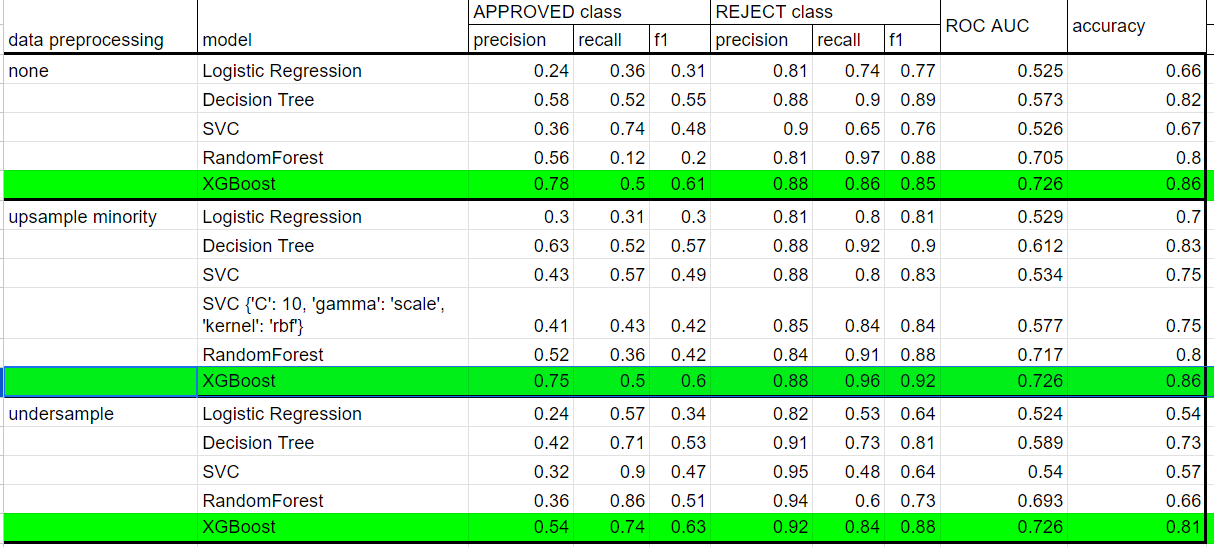
Untuned performance on upsampling, downsampling and imbalance dataset:
*   Logistic Regression performed poorly across all categories  with F1 scores  below 0.35 for the positive class regardless of the data preprocessing technique. It performed best with upsampling where it had an F1 score of 0.3  for the positive class.

*   XGBoost: This model performed well  with F1 scores in the 0.7-0.8 range for the positive class  across all categories. It performed best with none or upsampling the minority class, where it had an F1 score of 0.78 for the positive class.

*  Upsampling the minority class seems to be the best data preprocessing technique  for most of the models in this case. It improved the positive class recall for Logistic Regression, Decision Tree, and SVC. It also maintained a good positive class recall for Random Forest and XGBoost, the two models that performed best overall.


Training and Tuning pipeline:
*   `tune()`initiates model training and evaluation. If passed in param_grid, it will perform hyperparameter tuning.
*   given different sampling_method (smote, undersample, upsample_minority, none), it will resample the train data (NOT test data, which should remain intact)
*   `evaluate()` obtain the classification report from the training data and test data with cross validation.



In [ ]:
categorical_cols = ['jobTitle', 'loanReason']
numerical_cols = ['netSalary', 'financeAmount', 'loanTenure','ela', 'loanApplied','interestRate']

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report,roc_curve, roc_auc_score, auc, confusion_matrix
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
import warnings
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

def tune(dataset, model, sampling_method, categorical_cols, numerical_cols, param_grid=None):
  print("sampling method: ", sampling_method)
  X_train_resampled, y_train_resampled, X_test, y_test = resampling(dataset,sampling_method)
  X_train_preprocessed, X_test_preprocessed,column_transformer = preprocess(X_train_resampled, X_test,categorical_cols, numerical_cols)
  if param_grid:
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='f1_macro')
    grid_search.fit(X_train_preprocessed,y_train_resampled)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    print("Best hyperparameters:", best_params)
  else:
    best_model = model
    best_model.fit(X_train_preprocessed,y_train_resampled)
  evaluate(best_model,X_train_preprocessed,X_test_preprocessed,y_train_resampled, y_test)
  print("="*100)

def evaluate(best_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test):
    # cv_scores = cross_val_score(best_model, X_train_preprocessed, y_train, cv=5, scoring='accuracy')
    # print(f"Cross-validation scores: {cv_scores}")
    # print(f"Mean cross-validation score: {cv_scores.mean()}")

    # Accuracy on training data
    y_train_pred = best_model.predict(X_train_preprocessed)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training accuracy: {train_accuracy:.4f}")

    # Accuracy on test data
    y_test_pred = best_model.predict(X_test_preprocessed)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test accuracy: {test_accuracy:.4f}")

    # Generate cross-validated classification report
    cv_y_pred = cross_val_predict(best_model, X_train_preprocessed, y_train, cv=5)
    cv_report = classification_report(y_train, cv_y_pred)
    print("Cross-validated classification report:")
    print(cv_report)

    # Generate classification report on test data
    test_report = classification_report(y_test, y_test_pred)
    print("Classification report on test data:")
    print(test_report)

     # Confusion matrix on test data
    cm = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix on test data:")
    print(cm)

    scores = cross_val_score(best_model, X_test_preprocessed, y_test, scoring='roc_auc', cv=5, n_jobs=-1) # summarize performance
    print('Mean ROC AUC: %.3f' % np.mean(scores))


from imblearn.under_sampling import RandomUnderSampler

def print_class(data):
    # Map integer values to string values
    data['applicationStatus'] = data['applicationStatus'].replace({0: 'APPROVED', 1: 'REJECTED'})

    # Filter the data to include only 'APPROVED' and 'REJECTED'
    approved_rejected = data[data['applicationStatus'].isin(['APPROVED', 'REJECTED'])]

    # Calculate the number of rows for each status
    counts = approved_rejected['applicationStatus'].value_counts()

    # Print the counts
    print(counts)

def resampling(dataset,sampling_method):
    # Define features and target
    target = ['applicationStatus']
    label_encoder = LabelEncoder()
    y = dataset[target]
    y = pd.DataFrame(label_encoder.fit_transform(y))
    encoded_classes = label_encoder.classes_
    # print("Encoded classes:", encoded_classes)

    # Check the encoded values
    # print("Encoded y values:", y)
    X = dataset.drop(columns=target)
     # Encode categorical features
    categorical_cols = X.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        X[col] = label_encoder.fit_transform(X[col])

    # Fill missing values
    for column in X.columns:
        if X[column].dtype == 'object':
            # Fill NA values in categorical columns with the mode
            X[column].fillna(X[column].mode()[0], inplace=True)
        else:
            # Fill NA values in numerical columns with the median
            X[column].fillna(X[column].median(), inplace=True)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    if sampling_method == 'smote':
      smote = SMOTE(random_state=42,sampling_strategy='not majority')
      X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    elif sampling_method == 'undersample':
      under_sampler = RandomUnderSampler(random_state=42)
      X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)
    elif sampling_method == 'none':
      X_train_resampled = X_train
      y_train_resampled = y_train
    elif sampling_method == 'upsample_minority':
      y_train = y_train.reset_index(drop=True)
      X_train = X_train.reset_index(drop=True)

        # Combine X_train and y_train for resampling
      training_data = pd.concat([X_train, y_train], axis=1)
      training_data.columns = list(training_data.columns[:-1]) + ['applicationStatus']

        # Separate minority and majority classes
      minority_class = training_data[training_data['applicationStatus'] == 0]
      majority_class = training_data[training_data['applicationStatus'] == 1]

        # Upsample minority class
      minority_upsampled = resample(minority_class,
                                      replace=True,     # sample with replacement
                                      n_samples=len(majority_class),    # to match majority class
                                      random_state=123) # reproducible results

        # Combine majority class with upsampled minority class
      upsampled_training_data = pd.concat([majority_class, minority_upsampled])

        # Split upsampled data into features and target
      X_train_resampled = upsampled_training_data.drop('applicationStatus', axis=1)
      y_train_resampled = upsampled_training_data['applicationStatus']
    else:
      print('sampling method key is NOT FOUND')
    resampled_data = pd.concat([X_train_resampled, y_train_resampled], axis=1)
    resampled_data.columns = list(resampled_data.columns[:-1]) + ['applicationStatus']
    print_class(resampled_data)
    return X_train_resampled, y_train_resampled, X_test, y_test


def preprocess(X_train, X_test,categorical_cols, numerical_cols):
  preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'),categorical_cols)
    ],
    remainder='drop'  # Drop other columns not specified in transformers
    )
  # Preprocess the training data
  X_train_preprocessed = preprocessor.fit_transform(X_train)
  X_test_preprocessed = preprocessor.transform(X_test)
  return X_train_preprocessed, X_test_preprocessed, preprocessor

In [ ]:
!pip install xgboost

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
models = {
    # {1:1.12, 0:4.09}
    "LogisticRegression": LogisticRegression(class_weight='balanced',max_iter=10000),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42,class_weight='balanced'),
    "SVC": SVC(random_state=42, class_weight="balanced"),
    "RandomForestClassifier":RandomForestClassifier(random_state=42, class_weight='balanced'),
    # "Balanced RF": BalancedRandomForestClassifier(random_state=42, class_weight='balanced'),
    "XGBClassifier": XGBClassifier(class_weight='balanced')
}

data = pd.read_csv('/content/data.csv')
# data.dropna(inplace=True)
for model_name, model in models.items():
    print(f"Model: {model_name}")
    tune(data, model, 'none',categorical_cols, numerical_cols)

Model: LogisticRegression
sampling method:  none
applicationStatus
REJECTED    630
APPROVED    170
Name: count, dtype: int64
Training accuracy: 0.9087
Test accuracy: 0.6600
Cross-validated classification report:
              precision    recall  f1-score   support

           0       0.24      0.29      0.26       170
           1       0.80      0.76      0.78       630

    accuracy                           0.66       800
   macro avg       0.52      0.52      0.52       800
weighted avg       0.68      0.66      0.67       800

Classification report on test data:
              precision    recall  f1-score   support

           0       0.27      0.36      0.31        42
           1       0.81      0.74      0.77       158

    accuracy                           0.66       200
   macro avg       0.54      0.55      0.54       200
weighted avg       0.70      0.66      0.68       200

Confusion Matrix on test data:
[[ 15  27]
 [ 41 117]]
Mean ROC AUC: 0.525
Model: DecisionTreeClass

In [157]:
for model_name, model in models.items():
    print(f"Model: {model_name}")
    tune(data, model, 'smote',categorical_cols, numerical_cols)

Model: LogisticRegression
sampling method:  smote
applicationStatus
APPROVED    630
REJECTED    630
Name: count, dtype: int64
Training accuracy: 0.9095
Test accuracy: 0.6350
Cross-validated classification report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       630
           1       0.68      0.64      0.66       630

    accuracy                           0.67      1260
   macro avg       0.67      0.67      0.67      1260
weighted avg       0.67      0.67      0.67      1260

Classification report on test data:
              precision    recall  f1-score   support

           0       0.30      0.55      0.39        42
           1       0.85      0.66      0.74       158

    accuracy                           0.64       200
   macro avg       0.57      0.60      0.56       200
weighted avg       0.73      0.64      0.67       200

Confusion Matrix on test data:
[[ 23  19]
 [ 54 104]]
Mean ROC AUC: 0.545
Model: DecisionTreeClas

In [158]:
for model_name, model in models.items():
    print(f"Model: {model_name}")
    tune(data, model, 'upsample_minority',categorical_cols, numerical_cols)

Model: LogisticRegression
sampling method:  upsample_minority
applicationStatus
REJECTED    630
APPROVED    630
Name: count, dtype: int64
Training accuracy: 0.9460
Test accuracy: 0.7000
Cross-validated classification report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       630
           1       0.87      0.77      0.82       630

    accuracy                           0.83      1260
   macro avg       0.83      0.83      0.83      1260
weighted avg       0.83      0.83      0.83      1260

Classification report on test data:
              precision    recall  f1-score   support

           0       0.30      0.31      0.30        42
           1       0.81      0.80      0.81       158

    accuracy                           0.70       200
   macro avg       0.55      0.56      0.56       200
weighted avg       0.71      0.70      0.70       200

Confusion Matrix on test data:
[[ 13  29]
 [ 31 127]]
Mean ROC AUC: 0.529
Model: Deci

In [159]:
for model_name, model in models.items():
    print(f"Model: {model_name}")
    tune(data, model, 'undersample',categorical_cols, numerical_cols)

Model: LogisticRegression
sampling method:  undersample
applicationStatus
APPROVED    170
REJECTED    170
Name: count, dtype: int64
Training accuracy: 0.9382
Test accuracy: 0.5350
Cross-validated classification report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       170
           1       0.56      0.56      0.56       170

    accuracy                           0.56       340
   macro avg       0.56      0.56      0.56       340
weighted avg       0.56      0.56      0.56       340

Classification report on test data:
              precision    recall  f1-score   support

           0       0.24      0.57      0.34        42
           1       0.82      0.53      0.64       158

    accuracy                           0.54       200
   macro avg       0.53      0.55      0.49       200
weighted avg       0.70      0.54      0.58       200

Confusion Matrix on test data:
[[24 18]
 [75 83]]
Mean ROC AUC: 0.524
Model: DecisionTreeCl

### Hyperparameter tuning

In [161]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
lr = LogisticRegression(class_weight='balanced', max_iter=10000)
param_grid = {
    'C': [0.1, 1, 10.0, 100.0,1000.0],
    'solver': ['liblinear', 'saga','lbfgs']
}
data = pd.read_csv('/content/data.csv')
# data.dropna(inplace=True)
tune(data, lr, 'upsample_minority',categorical_cols, numerical_cols,param_grid)
# tune(data,lr,categorical_cols, numerical_cols,param_grid)

sampling method:  upsample_minority
applicationStatus
REJECTED    630
APPROVED    630
Name: count, dtype: int64
Best hyperparameters: {'C': 1000.0, 'solver': 'saga'}
Training accuracy: 0.9873
Test accuracy: 0.6900
Cross-validated classification report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       630
           1       0.94      0.81      0.87       630

    accuracy                           0.88      1260
   macro avg       0.89      0.88      0.88      1260
weighted avg       0.89      0.88      0.88      1260

Classification report on test data:
              precision    recall  f1-score   support

           0       0.27      0.29      0.28        42
           1       0.81      0.80      0.80       158

    accuracy                           0.69       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.70      0.69      0.69       200

Confusion Matrix on test data:
[[ 12  30]
 [ 32 126]]
Mea

In [162]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(random_state=42)
tree_param_grid = {
    'max_depth': [10, 20, 30,None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}
data = pd.read_csv('/content/data.csv')
tune(data, tree, 'upsample_minority',categorical_cols, numerical_cols,tree_param_grid)

sampling method:  upsample_minority
applicationStatus
REJECTED    630
APPROVED    630
Name: count, dtype: int64
Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training accuracy: 1.0000
Test accuracy: 0.8350
Cross-validated classification report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       630
           1       0.99      0.87      0.92       630

    accuracy                           0.93      1260
   macro avg       0.93      0.93      0.93      1260
weighted avg       0.93      0.93      0.93      1260

Classification report on test data:
              precision    recall  f1-score   support

           0       0.63      0.52      0.57        42
           1       0.88      0.92      0.90       158

    accuracy                           0.83       200
   macro avg       0.75      0.72      0.73       200
weighted avg       0.83      0.83      0.83       200

Confusion Matrix on test

In [163]:
from sklearn.svm import SVC
svc = SVC(random_state=42, class_weight="balanced")
svc_param_grid = {
    'C': [0.1, 1, 10, 100,1000],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
data = pd.read_csv('/content/data.csv')
tune(data, svc, 'upsample_minority',categorical_cols, numerical_cols,svc_param_grid)

sampling method:  upsample_minority
applicationStatus
REJECTED    630
APPROVED    630
Name: count, dtype: int64
Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Training accuracy: 1.0000
Test accuracy: 0.7500
Cross-validated classification report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       630
           1       0.96      0.92      0.94       630

    accuracy                           0.94      1260
   macro avg       0.94      0.94      0.94      1260
weighted avg       0.94      0.94      0.94      1260

Classification report on test data:
              precision    recall  f1-score   support

           0       0.41      0.43      0.42        42
           1       0.85      0.84      0.84       158

    accuracy                           0.75       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.75      0.75      0.75       200

Confusion Matrix on test data:
[[ 18  24]
 [

In [164]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
tune(data, rf, 'upsample_minority',categorical_cols, numerical_cols,param_grid)

sampling method:  upsample_minority
applicationStatus
REJECTED    630
APPROVED    630
Name: count, dtype: int64
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training accuracy: 1.0000
Test accuracy: 0.7950
Cross-validated classification report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       630
           1       0.97      0.85      0.91       630

    accuracy                           0.91      1260
   macro avg       0.92      0.91      0.91      1260
weighted avg       0.92      0.91      0.91      1260

Classification report on test data:
              precision    recall  f1-score   support

           0       0.52      0.36      0.42        42
           1       0.84      0.91      0.88       158

    accuracy                           0.80       200
   macro avg       0.68      0.63      0.65       200
weighted avg       0.77      0.80      0.78       200

C